In [2]:
import pandas as pd
df=pd.read_csv("F:\\py\\pandas\\timeseries\\nodatesaap.csv")
df


,Open,High,Low,Close,Volume
0,144.88,145.30,143.10,143.50,14277848
1,143.69,144.79,142.72,144.09,21569557
2,143.02,143.50,142.41,142.73,24128782
3,142.90,144.75,142.90,144.18,19201712
4,144.11,145.95,143.37,145.06,21090636
5,144.73,145.85,144.38,145.53,19781836
6,145.87,146.18,144.82,145.74,24884478
7,145.50,148.49,145.44,147.77,25199373
8,147.97,149.33,147.33,149.04,20132061
9,148.82,150.90,148.57,149.56,23793456


In [4]:
pwd

'C:\\Users\\write'

In [3]:
 df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Columns: 5 entries, Open to Volume
dtypes: float64(4), int64(1)
memory usage: 688.0 bytes


In [27]:
df[df.Close>=140]

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107
...,...,...,...,...,...
2017-03-23,141.26,141.58,140.61,140.92,20346301
2017-03-22,139.84,141.60,139.76,141.42,25860165
2017-03-20,140.40,141.50,140.23,141.46,21542038


In [28]:
df[df.Close==df.Close.max()]

,Open,High,Low,Close,Volume
Date,,,,,
2017-05-12,154.7,156.42,154.67,156.1,32527017


In [3]:
pd.date_range(start='7/01/2017',end='7/21/2017',freq='B')

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='B')

In [4]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

rng = pd.date_range(start="7/1/2017",end="7/23/2017", freq=us_cal)
rng

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='C')

In [5]:
df.set_index(rng,inplace=True)
df

,Open,High,Low,Close,Volume
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636
2017-07-11,144.73,145.85,144.38,145.53,19781836
2017-07-12,145.87,146.18,144.82,145.74,24884478
2017-07-13,145.50,148.49,145.44,147.77,25199373
2017-07-14,147.97,149.33,147.33,149.04,20132061
2017-07-17,148.82,150.90,148.57,149.56,23793456


In [6]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class myCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('My Birth Day', month=4, day=15,observance=nearest_workday)
        
    ]
    #holidays dates pop
    
myc = CustomBusinessDay(calendar=myCalendar())
pd.date_range('4/1/2017','4/30/2017',freq=myc)

DatetimeIndex(['2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-17', '2017-04-18', '2017-04-19',
               '2017-04-20', '2017-04-21', '2017-04-24', '2017-04-25',
               '2017-04-26', '2017-04-27', '2017-04-28'],
              dtype='datetime64[ns]', freq='C')

In [7]:
b = CustomBusinessDay(weekmask='Sun Mon Tue Wed Thu', holidays=['2017-07-04'])
pd.date_range(start='7/01/2017',end='7/29/2017',freq=b)
#setting weeekends in daterange


DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-05', '2017-07-06',
               '2017-07-09', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-16', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-23', '2017-07-24',
               '2017-07-25', '2017-07-26', '2017-07-27'],
              dtype='datetime64[ns]', freq='C')

In [12]:
df['2017-07-03':'2017-07-20']

,Open,High,Low,Close,Volume
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636
2017-07-11,144.73,145.85,144.38,145.53,19781836
2017-07-12,145.87,146.18,144.82,145.74,24884478
2017-07-13,145.50,148.49,145.44,147.77,25199373
2017-07-14,147.97,149.33,147.33,149.04,20132061
2017-07-17,148.82,150.90,148.57,149.56,23793456


In [14]:
df['2017-07-03':'2017-07-20'].Close.mean()

146.81846153846152

In [15]:
df.asfreq('D',method='pad')

,Open,High,Low,Close,Volume
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-04,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-08,142.90,144.75,142.90,144.18,19201712
2017-07-09,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636
2017-07-11,144.73,145.85,144.38,145.53,19781836
2017-07-12,145.87,146.18,144.82,145.74,24884478


In [16]:
df.asfreq('w',method='pad')     
#w for weekly

,Open,High,Low,Close,Volume
2017-07-09,142.90,144.75,142.90,144.18,19201712
2017-07-16,147.97,149.33,147.33,149.04,20132061


In [17]:
df.asfreq('h',method='pad')     
#hourly

,Open,High,Low,Close,Volume
2017-07-03 00:00:00,144.88,145.30,143.10,143.50,14277848
2017-07-03 01:00:00,144.88,145.30,143.10,143.50,14277848
2017-07-03 02:00:00,144.88,145.30,143.10,143.50,14277848
2017-07-03 03:00:00,144.88,145.30,143.10,143.50,14277848
2017-07-03 04:00:00,144.88,145.30,143.10,143.50,14277848
...,...,...,...,...,...
2017-07-20 20:00:00,151.50,151.74,150.19,150.34,17243748
2017-07-20 21:00:00,151.50,151.74,150.19,150.34,17243748
2017-07-20 22:00:00,151.50,151.74,150.19,150.34,17243748
2017-07-20 23:00:00,151.50,151.74,150.19,150.34,17243748


In [20]:
import pandas as pd
df= pd.read_csv('F:\\py\\pandas\\14_apple\\apple.csv',parse_dates=['Date'],index_col=['Date'])
df.head(5)


,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [21]:
df.Close.resample('M').mean()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

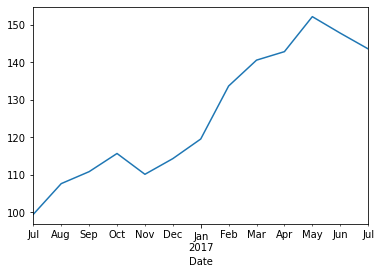

In [22]:
%matplotlib inline
df.Close.resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

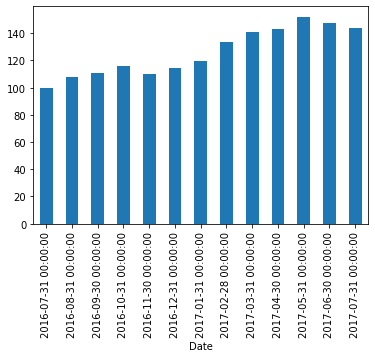

In [24]:
%matplotlib inline
df.Close.resample('M').mean().plot(kind='bar')      
    #resample for monthly,yearly

<AxesSubplot:xlabel='Date'>

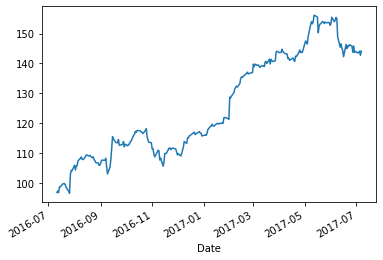

In [25]:
df.Close.plot()

<AxesSubplot:xlabel='Date'>

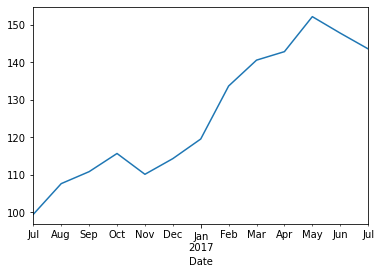

In [26]:
df.Close.resample('M').mean().plot()

In [69]:
import pandas as pd
df1= pd.read_csv('F:\\py\\pandas\\14_apple\\apple.csv',parse_dates=['Date'],index_col=['Date'])
df1.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [84]:
df2=df1[['Close']]


In [85]:

df2.shift(1)

,Close
Date,
2017-07-07,NaN
2017-07-06,144.18
2017-07-05,142.73
2017-07-03,144.09
2017-06-30,143.50
...,...
2016-07-15,99.83
2016-07-14,98.78
2016-07-13,98.79


In [86]:
df2['prev dates Closing']=df2['Close'].shift(1)
df2

C:\Users\write\AppData\Local\Temp/ipykernel_6728/1727378061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['prev dates Closing']=df2['Close'].shift(1)


,Close,prev dates Closing
Date,,
2017-07-07,144.18,NaN
2017-07-06,142.73,144.18
2017-07-05,144.09,142.73
2017-07-03,143.50,144.09
2017-06-30,144.02,143.50
...,...,...
2016-07-15,98.78,99.83
2016-07-14,98.79,98.78
2016-07-13,96.87,98.79


In [88]:
df2['One day change']=df2['Close']-df2['prev dates Closing']
df2

C:\Users\write\AppData\Local\Temp/ipykernel_6728/3060506952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['One day change']=df2['Close']-df2['prev dates Closing']


,Close,prev dates Closing,One day change
Date,,,
2017-07-07,144.18,NaN,NaN
2017-07-06,142.73,144.18,-1.45
2017-07-05,144.09,142.73,1.36
2017-07-03,143.50,144.09,-0.59
2017-06-30,144.02,143.50,0.52
...,...,...,...
2016-07-15,98.78,99.83,-1.05
2016-07-14,98.79,98.78,0.01
2016-07-13,96.87,98.79,-1.92


In [92]:
df2['5 day return'] =  (df2['Close'] - df2['Close'].shift(5))*100/df2['Close'].shift(5)

df2

C:\Users\write\AppData\Local\Temp/ipykernel_6728/2931801560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['5 day return'] =  (df2['Close'] - df2['Close'].shift(5))*100/df2['Close'].shift(5)


,Close,prev dates Closing,One day change,5 day return
Date,,,,
2017-07-07,144.18,NaN,NaN,NaN
2017-07-06,142.73,144.18,-1.45,NaN
2017-07-05,144.09,142.73,1.36,NaN
2017-07-03,143.50,144.09,-0.59,NaN
2017-06-30,144.02,143.50,0.52,NaN
...,...,...,...,...
2016-07-15,98.78,99.83,-1.05,0.121630
2016-07-14,98.79,98.78,0.01,-0.643669
2016-07-13,96.87,98.79,-1.92,-3.091236


In [97]:
df2=df2.fillna(method='bfill')
df2.interpolate()

,Close,prev dates Closing,One day change,5 day return
Date,,,,
2017-07-07,144.18,144.18,-1.45,-0.346789
2017-07-06,142.73,144.18,-1.45,-0.346789
2017-07-05,144.09,142.73,1.36,-0.346789
2017-07-03,143.50,144.09,-0.59,-0.346789
2017-06-30,144.02,143.50,0.52,-0.346789
...,...,...,...,...
2016-07-15,98.78,99.83,-1.05,0.121630
2016-07-14,98.79,98.78,0.01,-0.643669
2016-07-13,96.87,98.79,-1.92,-3.091236


In [100]:
df2.index= pd.date_range(start='2017-08-15',periods=251,freq='B')
df2
df2.tshift(1)

C:\Users\write\AppData\Local\Temp/ipykernel_6728/1578511367.py:3: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df2.tshift(1)


,Close,prev dates Closing,One day change,5 day return
2017-08-16,144.18,144.18,-1.45,-0.346789
2017-08-17,142.73,144.18,-1.45,-0.346789
2017-08-18,144.09,142.73,1.36,-0.346789
2017-08-21,143.50,144.09,-0.59,-0.346789
2017-08-22,144.02,143.50,0.52,-0.346789
...,...,...,...,...
2018-07-26,98.78,99.83,-1.05,0.121630
2018-07-27,98.79,98.78,0.01,-0.643669
2018-07-30,96.87,98.79,-1.92,-3.091236
2018-07-31,97.42,96.87,0.55,-2.453189


In [40]:
import pandas as pd
df=pd.read_csv('F:\\py\\pandas\\timeseires2 periodandperiodindex\\wea.csv')

In [32]:
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [41]:
df.set_index("Line Item",inplace=True)
df = df.T
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [46]:
df.index = pd.PeriodIndex(df.index, freq="Q-JAN")
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [47]:
df["Start Date"]=df.index.map(lambda x: x.start_time)
df

Line Item,Revenue,Expenses,Profit,Start Date
2017Q1,115904,86544,29360,2016-02-01
2017Q2,120854,89485,31369,2016-05-01
2017Q3,118179,87484,30695,2016-08-01
2017Q4,130936,97743,33193,2016-11-01
2018Q1,117542,87688,29854,2017-02-01


In [48]:
df["End Date"]=df.index.map(lambda x: x.end_time)
df

Line Item,Revenue,Expenses,Profit,Start Date,End Date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


In [51]:
from pytz import all_timezones as tz
print (all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [54]:
rng=pd.date_range(start='1/1/2017',periods=10,freq='H',tz='Europe/London')
rng

DatetimeIndex(['2017-01-01 00:00:00+00:00', '2017-01-01 01:00:00+00:00',
               '2017-01-01 02:00:00+00:00', '2017-01-01 03:00:00+00:00',
               '2017-01-01 04:00:00+00:00', '2017-01-01 05:00:00+00:00',
               '2017-01-01 06:00:00+00:00', '2017-01-01 07:00:00+00:00',
               '2017-01-01 08:00:00+00:00', '2017-01-01 09:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

In [55]:
rng=pd.date_range(start='1/1/2017',periods=10,freq='H',tz='dateutil/Europe/London')
rng

DatetimeIndex(['2017-01-01 00:00:00+00:00', '2017-01-01 01:00:00+00:00',
               '2017-01-01 02:00:00+00:00', '2017-01-01 03:00:00+00:00',
               '2017-01-01 04:00:00+00:00', '2017-01-01 05:00:00+00:00',
               '2017-01-01 06:00:00+00:00', '2017-01-01 07:00:00+00:00',
               '2017-01-01 08:00:00+00:00', '2017-01-01 09:00:00+00:00'],
              dtype='datetime64[ns, tzfile('Europe/Belfast')]', freq='H')

In [56]:
rng = pd.date_range(start="2017-08-22 09:00:00",periods=10, freq='30min')
s = pd.Series(range(10),index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [57]:
b=s.tz_localize(tz='Europe/Berlin')
b

2017-08-22 09:00:00+02:00    0
2017-08-22 09:30:00+02:00    1
2017-08-22 10:00:00+02:00    2
2017-08-22 10:30:00+02:00    3
2017-08-22 11:00:00+02:00    4
2017-08-22 11:30:00+02:00    5
2017-08-22 12:00:00+02:00    6
2017-08-22 12:30:00+02:00    7
2017-08-22 13:00:00+02:00    8
2017-08-22 13:30:00+02:00    9
dtype: int64

In [58]:
m=s.tz_localize(tz='Asia/Calcutta')
m

2017-08-22 09:00:00+05:30    0
2017-08-22 09:30:00+05:30    1
2017-08-22 10:00:00+05:30    2
2017-08-22 10:30:00+05:30    3
2017-08-22 11:00:00+05:30    4
2017-08-22 11:30:00+05:30    5
2017-08-22 12:00:00+05:30    6
2017-08-22 12:30:00+05:30    7
2017-08-22 13:00:00+05:30    8
2017-08-22 13:30:00+05:30    9
dtype: int64